# Global Trade and Its Environmental Footprint

Using two datasets from University of Gothenberg's Quality of Government (QoG), I will explore the impact of international trade on pollution levels in five countries that have been major players in global trade over the past 50 years. The goal is to determine whether increased trade activity has influenced pollution trends in these nations. 

## Preparing the datasets 


In [1]:
# Import packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
from plotly import express as px
from plotly.subplots import make_subplots

In [2]:
bas = pd.read_csv('https://www.qogdata.pol.gu.se/data/qog_bas_ts_jan24.csv')

In [3]:
ei = pd.read_csv('https://www.qogdata.pol.gu.se/data/qog_ei_ts_sept21.csv')

I will first merge the datasets and filter the variables I want to keep. 

Variables from the Economic and Politics Basic Dataset (bas): 

- wdi_trade (% of GDP): total sum of exports and imports measured as share of gross domestic product 

- gle_exp (Total Export): total export of a country, in millions of current year US dollars

- gle_imp (Total Import): This amounts to the total import of a country, in millions of current year US dollars


Variables from the Environmental Indicators Dataset(ei):

- epi_msw (controlled solid waste): proportion of household and commercial waste generated in a country that is collected and treated in a manner that controls environmental risks

- edgar_pm25 (PM2.5 emissions): This variable quantifies the total emissions of particulate matter with a diameter of 2.5 micrometers or smaller, aggregated across sectors per country, in kilotonnes (kt) per year

- edgar_co2pc (CO2 emissions per capita): The total CO2 emissions per country, divided by each country’s respective population. Units are tonnes of CO2 per capita per year.




In [4]:
bas_ei = (pd.merge(bas, ei, how = 'outer', on = ['year', 'cname', 'ccode_qog']))[
    [
         'cname', 'ccode_qog', 'year','wdi_trade','wdi_pop','gle_exp', 'gle_imp','edgar_co2pc','edgar_pm25','epi_msw'
    ]]

I only want data collected between 1970 and 2019.

In [5]:
bas_ei = bas_ei[(bas_ei['year'] >= 1970) & (bas_ei['year'] <= 2019)].drop_duplicates()

In [6]:
bas_ei[['wdi_trade','wdi_pop','gle_exp', 'gle_imp','edgar_co2pc','edgar_pm25','epi_msw']].isna().sum()

wdi_trade      4219
wdi_pop        2506
gle_exp        6032
gle_imp        6032
edgar_co2pc    3168
edgar_pm25     3422
epi_msw        6454
dtype: int64

## Examining Trade Data

I will create plots to examine the trends of import and export levels: 

1) Total imports and exports as share of GDP 

2) Total imports (USD) 

3) Total exports (USD) 


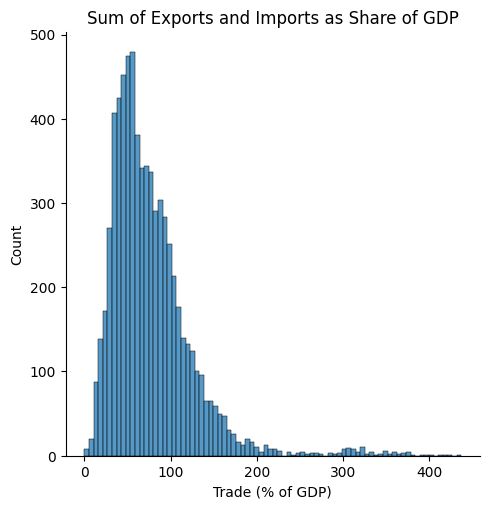

In [7]:
trade = sns.displot(bas_ei.wdi_trade)
trade.set_xlabels("Trade (% of GDP)")
plt.title("Sum of Exports and Imports as Share of GDP")
plt.show(trade)

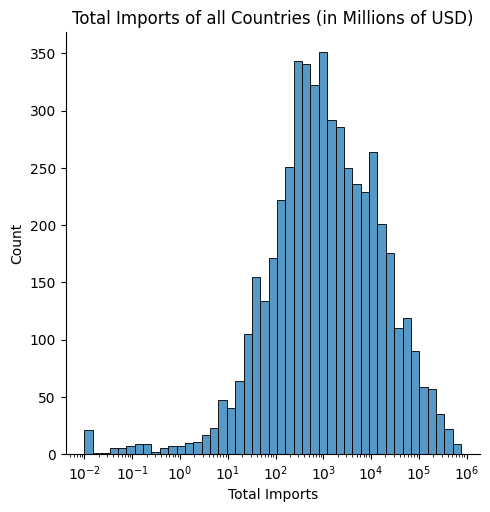

In [8]:
imp = sns.displot(bas_ei.gle_imp, log_scale = True)
imp.set_xlabels("Total Imports")
plt.title("Total Imports of all Countries (in Millions of USD)")
plt.show(imp)

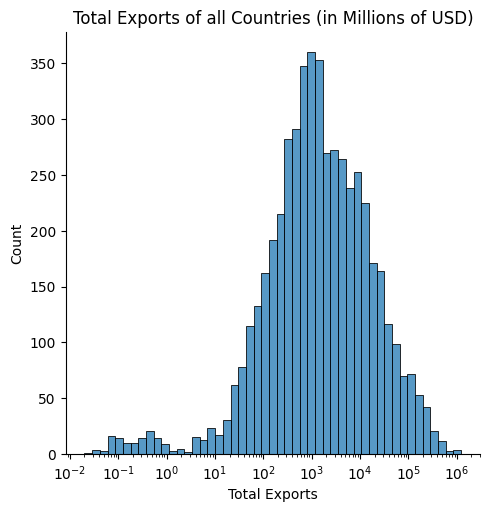

In [9]:
exp = sns.displot(bas_ei.gle_exp,log_scale = True)
exp.set_xlabels("Total Exports")
plt.title("Total Exports of all Countries (in Millions of USD)")
plt.show()

## Preliminary insights based on trade plots 

The plots show that the majority of countries have trade (exports and imports) as a smaller portion of their GDP, while a few countries exhibit much higher trade percentages. In terms of total imports and exports, most countries have moderate values, with the majority of trade activity concentrated in a middle range. However, a small number of countries account for significantly higher volumes of both imports and exports, reflecting their larger trade activities relative to others.

## Examining Environmental Pollutants

I will create plots to examine potential trends in country imports and exports: 

1) Controlled Solid waste  

2) CO2 Emissions per Capita 

3) PM25 Emissions (kt of PM2.5 /year)

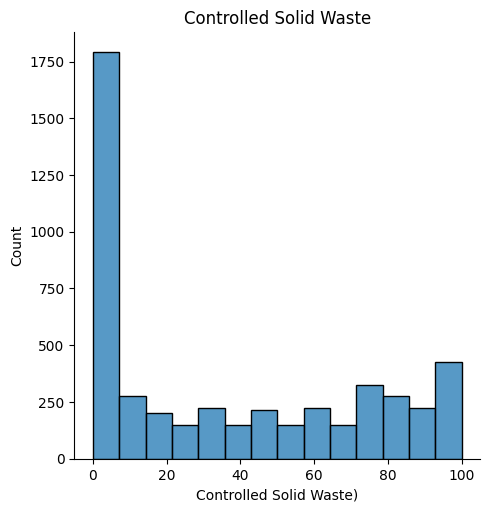

In [10]:
msw = sns.displot(bas_ei.epi_msw)
msw.set_xlabels("Controlled Solid Waste)")
plt.title("Controlled Solid Waste")
plt.show(msw)

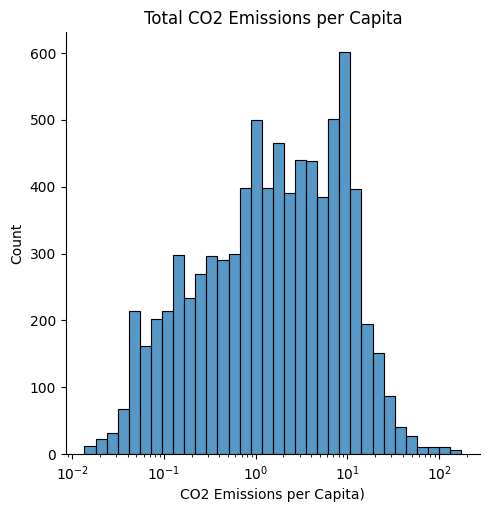

In [11]:
edgar_co2pc = sns.displot(bas_ei.edgar_co2pc,log_scale = True)
edgar_co2pc.set_xlabels("CO2 Emissions per Capita)")
plt.title("Total CO2 Emissions per Capita")
plt.show(edgar_co2pc)

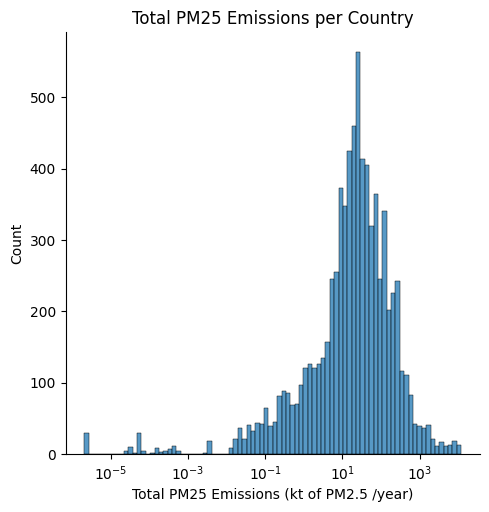

In [12]:
pm25 = sns.displot(bas_ei.edgar_pm25, log_scale = True)
pm25.set_xlabels("Total PM25 Emissions (kt of PM2.5 /year)")
plt.title("Total PM25 Emissions per Country")
plt.show(pm25)

## Preliminary insights based on pollutant plots 

The plots show that the majority of countries have low to moderate levels of controlled solid waste, with a small number of countries managing nearly all their waste. CO2 emissions per capita are widely distributed, with most countries falling between 1 to 10 tons per person, but a few countries have much higher emissions. PM2.5 emissions also vary greatly, with most countries emitting moderate levels, but a few outliers have significantly higher emissions, likely due to industrial activity and population size.

## Analyzing the Correlation Between Trade Levels and Particulate Matter Pollution in Major Contributing Countries

Next, I will create plots that combine the two variable categories to examine the correlation between trade levels and the amount of particulate matter and CO2 in the air. I will use data from only five countries known for their high trade levels and significant contributions to pollution. By concentrating on countries with significant and well-documented activities, I hope to observe more pronounced trends and correlations.

Countries of focus: 

China, India, United States of America, Germany, and Japan


## Comparison of Trends Across Five Major Economies 

### Deductions based on graphs 
- For China and India, increased trade appears correlated with rising pollution levels, suggesting that economic growth driven by trade may come at the cost of environmental degradation, especially in emerging economies.
- For developed countries like Germany, Japan, and the United States, the relationship between trade and pollution is less pronounced, indicating that technology and regulations may play a significant role in mitigating pollution despite high trade activities.
- Germany and Japan have relatively low emissions while maintaining strong trade, suggesting that policies and technologies can significantly reduce pollution even with high economic activity. This may imply that the impact of trade on pollution depends not just on the scale of trade but also on how the trade activities are managed.

### Unclear aspects
- While a correlation between increased trade and rising pollution is evident in China and India, the cause-effect relationship remains unclear. It is not explicitly clear whether the increase in pollution is directly due to increased trade or due to other industrial activities.
- Factors such as policy changes, technological advancements, and shifts in energy sources are not shown in the graphs but may significantly influence emission levels. For instance, Germany’s stable emissions despite high trade may be due to such factors, which cannot be directly inferred from the graphs alone
- The type of goods being traded and the industries driving trade growth are not specified. Emission levels could be heavily influenced by the nature of trade, such as whether the economy is more focused on heavy industry or high-tech manufacturing.


In [16]:
focal_countries = ['China', 'India', 'United States of America (the)','United States of America', 'Japan','Germany']
bas_ei = bas_ei[bas_ei['cname'].isin(focal_countries)]

bas_ei_trade = bas_ei.dropna(subset=['wdi_trade', 'year', 'cname'])
fig_trade = px.line(bas_ei_trade, x='year', y='wdi_trade', color='cname',
                    title="Trade Percentage of GDP by Country",
                    labels={
                        "year": "Year",
                        "wdi_trade": "Trade (% of GDP)",
                        "cname": "Country"
                    })
fig_trade.show()

In [14]:
bas_epi_pm25 = bas_ei.dropna(subset=['edgar_pm25', 'year', 'cname'])
fig_pm25 = px.line(bas_epi_pm25, x='year', y='edgar_pm25', color='cname',
                   title="PM 2.5 Emission Levels by Country",
                   labels={
                       "year": "Year",
                       "edgar_pm25": "PM2.5 Emissions (Tons per Year)",
                       "cname": "Country"
                   })
fig_pm25.show()

In [15]:
bas_ei_edgar_co2pc = bas_ei.dropna(subset=['edgar_co2pc', 'year', 'cname'])
fig_pm25 = px.line(bas_ei_edgar_co2pc, x='year', y='edgar_co2pc', color='cname',
                   title="CO2 Emission Levels by Country",
                   labels={
                       "year": "Year",
                       "edgar_co2pc": "CO2 Emissions per Capita",
                       "cname": "Country"
                   })
fig_pm25.show()

## Conclusion

The data suggests that high trade levels do not necessarily lead to higher air pollution, indicating that a direct correlation between trade activity and pollution levels is not universally present. Countries with significant trade activity do not always experience the highest emissions, while some countries with lower trade levels face substantial pollution. To understand these disparities, it is crucial to examine the types of goods being imported and exported, as well as the industries driving economic activity.

The environmental impact of trade depends not only on the transportation of goods, which releases pollutants like CO₂ and particulate matter, but also on the type of products being manufactured and exported. Industries with heavy manufacturing and lax environmental regulations tend to generate more pollution, which may explain why some countries face higher emissions despite lower trade volumes. For example, Germany, with its high trade levels, maintains relatively low particulate emissions due to a diverse range of exports, technological advancements, and investments in cleaner energy. In contrast, China, with its large manufacturing sector, experiences higher PM 2.5 emissions due to the nature of its industrial activities.

In conclusion, there is no clear, consistent positive correlation between trade levels and pollution across all countries. Further investigation is needed to understand which stages of the trade cycle contribute most significantly to environmental pollution, focusing on industry types, production practices, and regulatory standards.